In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('flights_info.csv')

# Convert inbound and outbound price to numeric values
for column in df.columns[2:4]:
    df[column] = (df[column]
                  .str.split()
                  .apply(lambda x: x[1])
                  .pipe(lambda df: df.str.replace(",", ""))
                  .pipe(lambda df: pd.to_numeric(df))
                  )
df = df.astype(
{'inbound_date': 'datetime64[ns]', 'outbound_date': 'datetime64[ns]'})

# Calculate total cost
df['total_price'] = df['outbound_price']+df['inbound_price']


In [48]:
#Cumple
df[(df['outbound_date']<pd.to_datetime('2025-2-28')) & (df['inbound_date']>pd.to_datetime('2025-2-28'))].sort_values(by='total_price')

,outbound_date,inbound_date,outbound_price,inbound_price,total_price
42,2025-02-18,2025-03-05,475.89,394.10,869.99
220,2025-02-18,2025-03-03,475.89,404.00,879.89
222,2025-02-20,2025-03-05,500.89,394.10,894.99
499,2025-02-20,2025-03-06,500.89,394.10,894.99
47,2025-02-23,2025-03-10,482.89,422.00,904.89
46,2025-02-22,2025-03-09,500.89,422.00,922.89
41,2025-02-16,2025-03-03,523.89,403.00,926.89
225,2025-02-23,2025-03-08,516.89,421.00,937.89
502,2025-02-23,2025-03-09,516.89,421.00,937.89
40,2025-02-15,2025-03-02,523.89,421.00,944.89


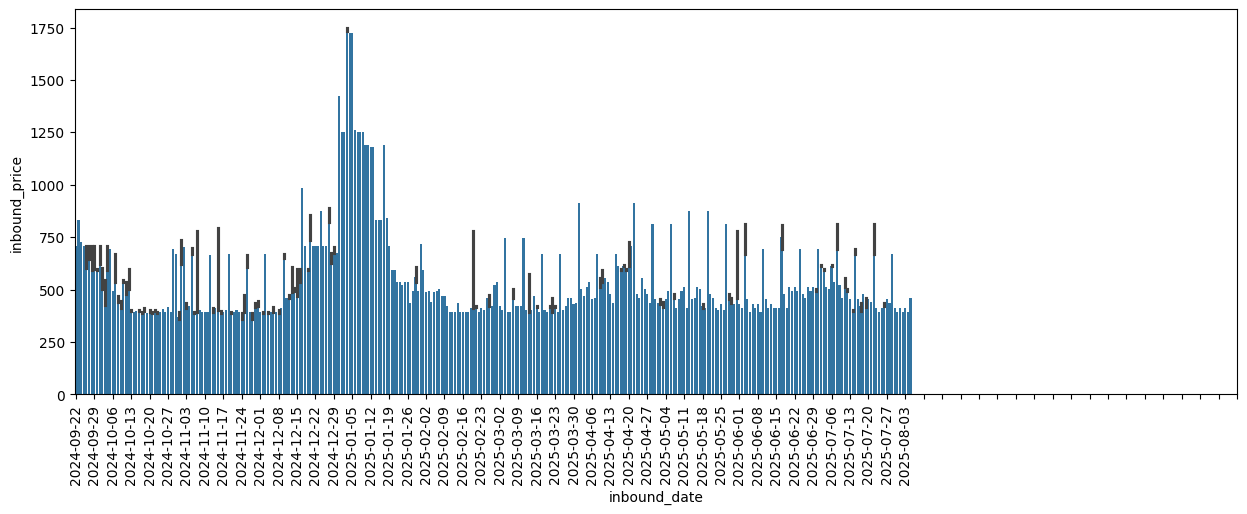

In [38]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=df.sort_values(by='inbound_date'),
                 x='inbound_date', y='inbound_price',)
plt.xticks(range(0, len(df['inbound_date'])//2, 7), rotation=90)
plt.show()

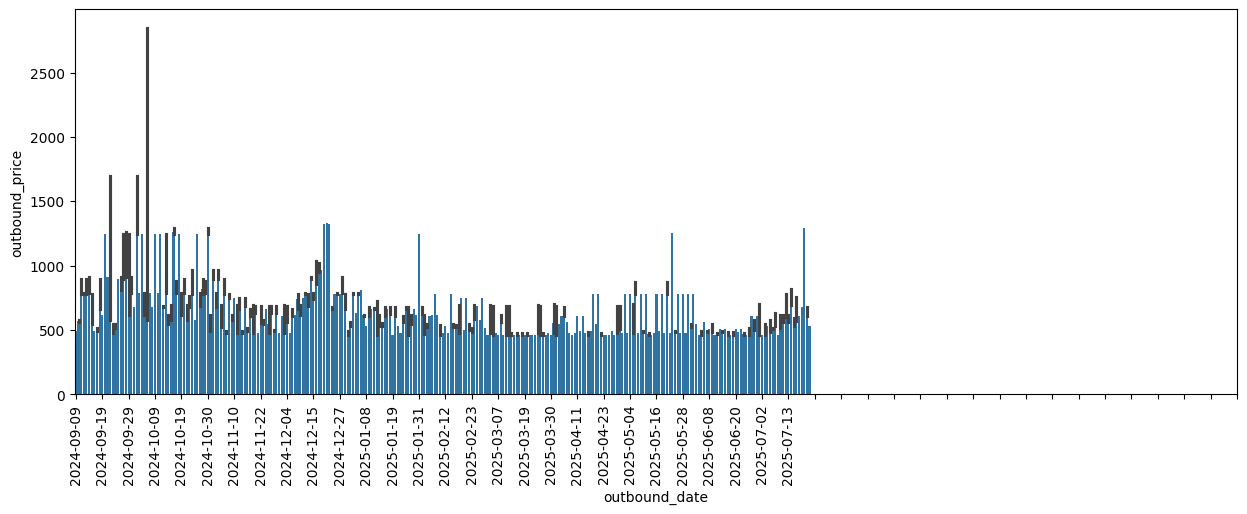

In [39]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=df.sort_values(by='outbound_date'),
                 x='outbound_date', y='outbound_price',)
plt.xticks(range(0, len(df['outbound_date'])//2, 10), rotation=90)
plt.show()

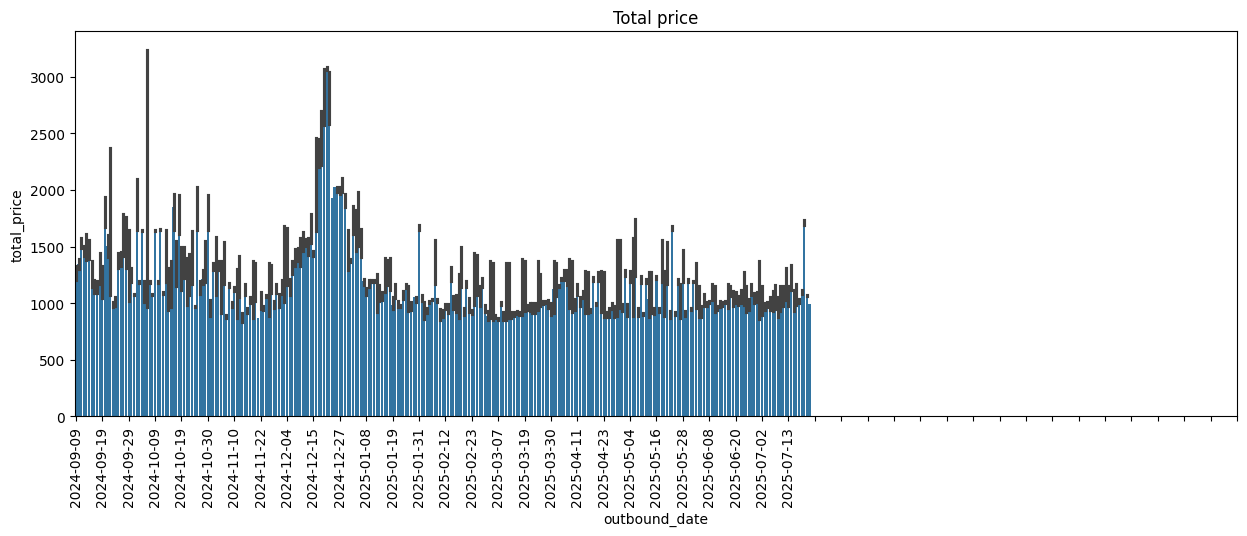

In [40]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=df.sort_values(by='outbound_date'),
                 x='outbound_date', y='total_price')
plt.xticks(range(0, len(df['outbound_date'])//2, 10), rotation=90)
plt.title('Total price')
plt.show()

In [41]:
pd.to_datetime(df['inbound_date'])-pd.to_datetime(df['outbound_date'])

0     15 days
1     15 days
2     15 days
3     15 days
4     15 days
        ...  
879   15 days
880   15 days
881   15 days
882   15 days
883   19 days
Length: 884, dtype: timedelta64[ns]